# How to Improvise Jazz Melodies
Bob Keller
Harvey Mudd College
January 2007
Revised September 4, 2012

There are different forms of jazz improvisation. For example, in “free improvisation”, the player is under absolutely no constraints. The listener is also under no obligation to remain a listener, and may tend to leave the scene if what she is hearing seems too close to random noise. Here we concentrate on “constrained improvisation”, meaning that we are playing over the chord changes of a tune.

## Know the Tune
It is a good idea to have some familiarity with the way the tune sounds with its original melody. Seasoned players can sometimes skip this, because the tune is similar to some other tune. There are fewer chord-change ideas than there are tunes, and there is a lot of reuse over the universal songbook. Coming up with new chord changes is not that easy for composers.

It is also good to be able to sense roughly where you are in the tune just by hearing the chord changes without the melody. This is achieved mostly by listening to the tune enough times, but an experienced player can hear it by reading the chord changes as well.

Finally, if the tune has words, it is helpful to know some of them and the story they are telling. Of course this is mandatory for the vocalist, but the instrumentalist can benefit by knowing the spirit of the tune.

## Play off the Melody
The most time-honored form of improvisation is to make small modifications to the melody, some times called “ad-libbing” (from latin “ad libitum” meaning freely). This is a good place to start, and also use in an occasional fashion later on.

## Know the Chord Changes
While it is good to be able to play “by ear”, it is best not to rely on having the chords sounded as your only method. For example, the chord might not always be sounded before you want the next note of your melody. Also, the comping (accompanying, or compensating) instrument in the rhythm section might drop out for a chorus, leaving just you and the bass and drums, just you and the drums, or just you in some cases. Unless you can hear the chords in your head, you might be stuck at this point.

## Use Chord Tones
Melody notes that are in the chord are very stable and resonate with the chord. Thirds and sevenths are particularly good choices. Below all notes in the melody are in the F chord.

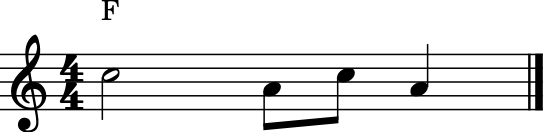

In [2]:

from music21 import *
from IPython.display import Image

def create_score(info, notes):
    s = stream.Score()
    part = stream.Part()
    if info[0] == "Treble":
        part.append(clef.TrebleClef())
    elif info[0] == "Bass":
        part.append(clef.BassClef)
    elif info[0] == "None":
        part.append(clef.NoClef())
    part.append(key.KeySignature(info[1]))
    part.append(meter.TimeSignature(info[2]))
    
    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            is_tie = "none"
            note_and_length = n.split("/")
            note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length == "0.3":
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if note_name.lower() == "r":
                add_n = note.Rest(quarterLength=note_length)
            else:
                add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col
            part.append(add_n)
    
    s.append(part)
    return Image(filename=s.write("musicxml.png"))

info = ["Treble", 0, "4/4"]
notes = "!F C5/2 A4/.5 C5/.5 A4/1"
create_score(info, notes)

## Use Color Tones
Often other tones are added to the chord to make a larger chord. Often this is done on the fly by the comping instrument. Sometimes these are implied by the original melody, and sometimes they are just known from experience. For example, over F major, it is reasonable safe to add (D the 6th, G the 9th, and E the major 7th). An awareness of the theory will help you know what tones sound good.

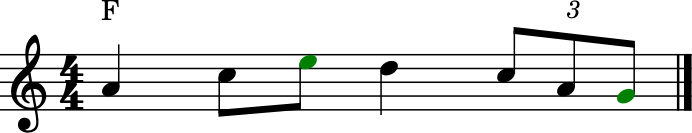

In [3]:
notes = "!F A4/1 C5/0.5 E5/0.5*green D5/1 C5/0.3 A4/0.3 G4/0.3*green"
create_score(info, notes)

*Using color tones (shown in green)*

## Use Arpeggios
An arpeggio consists of adjacent chord tones (or color tones, which are tones of an implied chord). They can go up or down, as in the following examples:

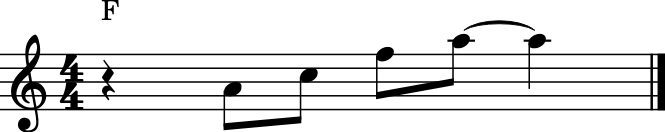

In [4]:
notes = "!F R/1 A4/0.5 C5/0.5 F5/0.5 A5/0.5{ A5/1}"
create_score(info, notes)

## Use Approach Tones
In the preceding example, the Bb is also ok because it *approaches* the chord tone a half- step away. This idea is often used to get a “jazzy” sound, even with notes that are not in the scale. Here is an extension of the previous example. Note that the F# is not remotely consistent with the F major chord, but it “works” because it approaches the G, which is a color tone over the F major.

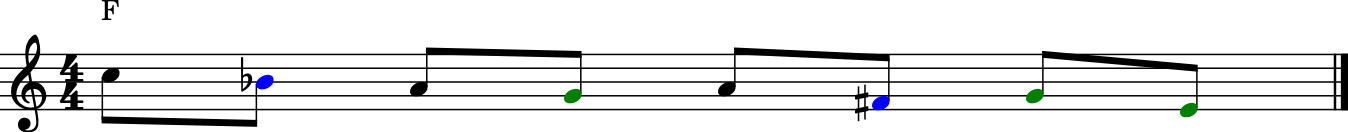

In [5]:
notes = "!F C5/0.5 B-4/0.5*blue A4/0.5 G4/0.5*green A4/0.5 F#4/0.5*blue G4/0.5*green E4/0.5*green"
create_score(info, notes)

*Approach tones (shown in blue)*

Below, the first E, which is a color tone, also functions as an approach tone.

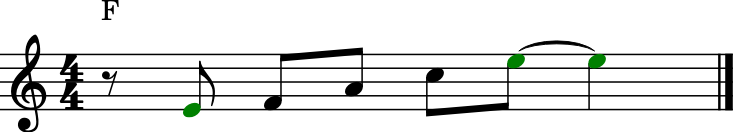

In [6]:
notes = "!F R/0.5 E4/0.5*green F4/0.5 A4/0.5 C5/0.5 E5/0.5*green{ E5/1*green}"
create_score(info, notes)

*Arpeggio on chord tones (starting on the major 7th, also on approach tone)*

The next example shows the tonic of the chord functioning as an approach tone, to the E.

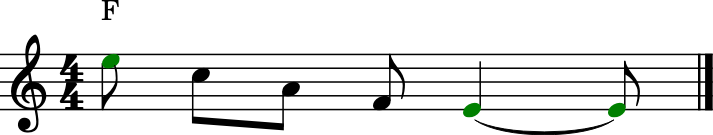

In [7]:
notes = "!F E5/0.5*green C5/0.5 A4/0.5 F4/0.5 E4/1*green{ E4/0.5*green}"
create_score(info, notes)

*Descending arpeggio starting and ending on the major 7th.*

*The tonic F functions as an approach tone (discussed on page 4) in this case.*

## Use Multiple Approach Tones
Instead of just one approach tone, use a chromatic run of two, three, or more, as shown 
below.

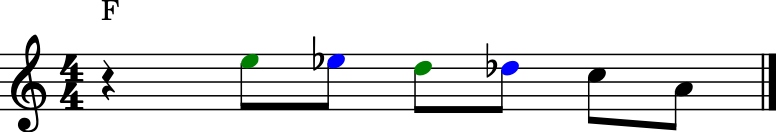

In [8]:
notes = "!F R/1 e5/0.5*green e-5/0.5*blue d5/0.5*green d-5/0.5*blue c5/0.5 a4/0.5"
create_score(info, notes)

*Multiple approach tones*

## Know Scales that go with the Chords
This is not always as difficult as it might seem at first, because the same scale will often 
work over multiple chords in succession. Here we treat “scale” as “set of notes” rather 
than “sequence of notes”. Typical scales that go with chords are given in the appendix. 
For example, the same scale, F major, can be used over all three chords in the II-V-I 
progression below, although different tones are normally emphasized over each one.

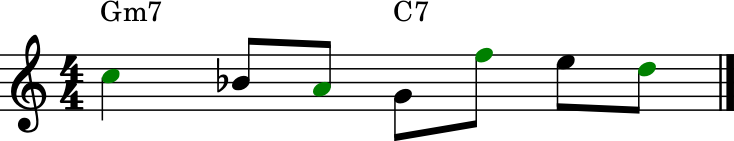

In [9]:
notes = "!Gm7 c5/1*green b-4/0.5 a4/0.5*green !C7 g4/0.5 f5/0.5*green e5/0.5 d5/0.5*green"
create_score(info, notes)

*Using scale sequential fragments*

In playing with scale fragments, it is best if chord tones are hit on the beat rather than off, 
unless an appoggiatura (from the Italian word appoggiare, "to lean upon") effect is 
desired. Below is the line from above staggered so that the chord tones are off the beat. 
While the Bb could be regarded as an appoggiatura, it is not really held long enough to 
have that effect.

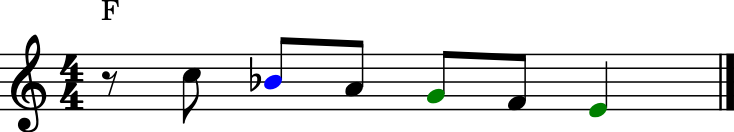

In [10]:
notes = "!F R/0.5 c5/0.5 b-4/0.5*blue a4/0.5 g4/0.5*green f4/0.5 e4/1*green"
create_score(info, notes)

*Scale fragment with chord tones off the beat*

## Avoid “Avoid Notes”
“Avoid note” is the jazz player’s term for a note that is in a common scale for a chord, 
but which shouldn’t be sustained (say longer than an eighth-note) over that chord because 
it is very dissonant, to the point of sounding harsh. In a way, it is saying that the scale 
should actually be reduced to a *smaller* scale in this particular intended use, by dropping 
the avoid notes. An example of an “avoid note” is the fourth of a major scale over a 
major chord. If played in the octave above the chord itself, this note creates a minor-ninth 
over the third of the chord, which sounds discordant. Short notes of the same pitch are not 
generally a problem and can be used in passing.

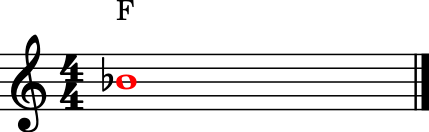

In [11]:
notes = "!F b-4/4*red"
create_score(info, notes)

*An "avoid note"

## Convert Errors to Approach and Passing Tones
You will make mistakes, where you brain or your ears tell you to play a note that ends up 
being discordant with the harmony. Even professionals make such mistakes. When your 
ears tell you that you have played a note that doesn’t sound good, minimize the damage 
by not continuing to hold that note but rather treating it as a chromatic approach to 
another note. Usually, the note on either side of the note you played will sound ok, if not 
great. Apply this technique iteratively: keep extending your line until you get to a safe 
place, on a chord you know, then regroup and consider your next line. It is best if you can 
avoid holding the bad note longer than an eighth note. Conversely, choose notes that you 
plan to hold for a longer time carefully.

## Change Direction
In using both scales and arpeggios, direction changes during the figure can provide 
variety and increase interest. Here are a few examples.

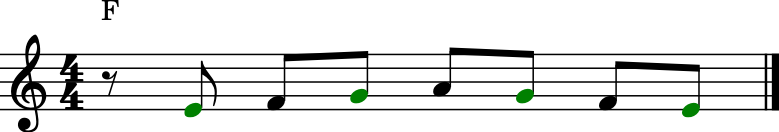

In [12]:
notes = "!F r/0.5 e4/0.5*green f4/0.5 g4/0.5*green a4/0.5 g4/0.5*green f4/0.5 e4/0.5*green"
create_score(info, notes)

*Changing direction in a scale*

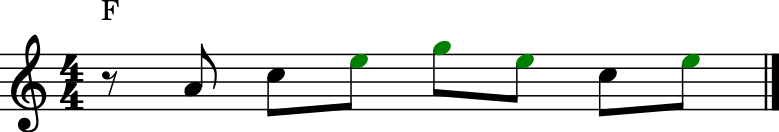

In [13]:
notes = "!F r/0.5 a4/0.5 c5/0.5 e5/0.5*green g5/0.5*green e5/0.5*green c5/0.5 e5/0.5*green"
create_score(info, notes)

*Changing direction (twice) in an arpeggio*

## Skip Notes or Zig-Zag
In a scale or arpeggio, skipping notes can create more nuance, especially if combined 
with direction change. The limiting case would be a “zig-zag” effect.

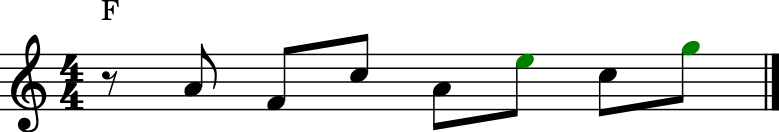

In [14]:
notes = "!F r/0.5 a4/0.5 f4/0.5 c5/0.5 a4/0.5 e5/0.5*green c5/0.5 g5/0.5*green"
create_score(info, notes)

*Skipping notes and zig-zagging in an arpeggio (major 9th chord implied)*

## Use Enclosures
To “enclose” means to approach a note from both sides alternatively. Enclosures are most 
effective when the tone enclosed is a chord tone. Below, the red coloring indicates that 
the note in question would be considered discordant. However, because this note is short 
and part of the enclosure idiom, the result sounds fine.

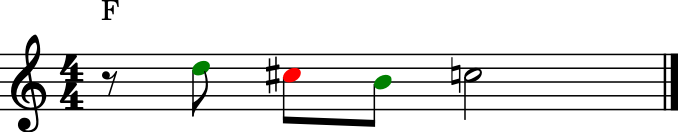

In [15]:
notes = "!F r/0.5 d5/0.5*green c#5/0.5*red b4/0.5*green c5/2"
create_score(info, notes)

*An enclosure: Here the chromatic Db and B enclose the C.* 

*The D acts as an approach to the enclosure.*

## Use Repitition and Sequencing
A good-sounding melodic idea can be repeated immediately, or later in the solo. When 
the repeated melody shape is transposed to go with a different chord or scale, this is 
called “sequencing”. Repetition need not recurr on the same part of the beat, as the first 
example below shows. For good examples, refer to some Thelonious Monk compositions, 
such as “Straight, No Chaser” or “Rhythm-ning”.

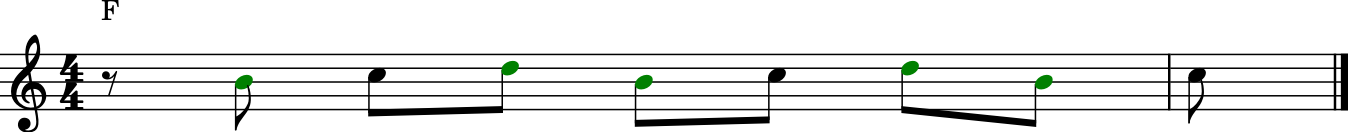

In [16]:
notes = "!F r/0.5 b4/0.5*green c5/0.5 d5/0.5*green b4/0.5*green c5/0.5 d5/0.5*green b4/0.5*green c5/0.5"
create_score(info, notes)

*Repitition*

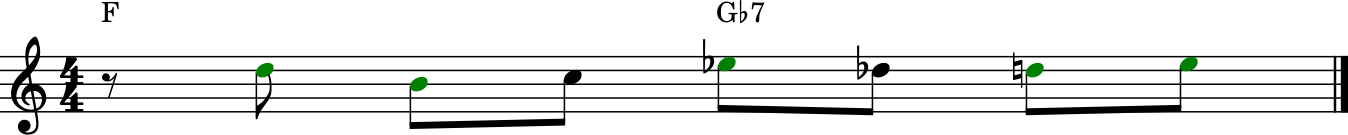

In [17]:
notes = "!F r/0.5 d5/0.5*green b4/0.5*green c5/0.5 !G-7 e-5/0.5*green d-5/0.5 d5/0.5*green e-5/0.5*green"
create_score(info, notes)

*Sequencing: The repeated figure is sequenced a half-step higher*

## Quote Freely
It is common to play fragments of other standard tunes or well-known solos within ones 
own solo. This usually produces a surprising effect and is considered a form of humor.

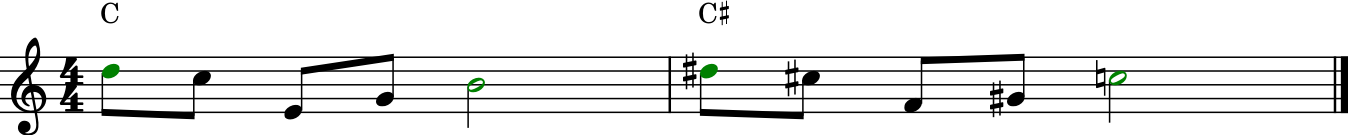

In [18]:
notes = "!C d5/0.5*green c5/0.5 e4/0.5 g4/0.5 b4/2*green !C# d#5/0.5*green c#5/0.5 f4/0.5 g#4/0.5 c5/2*green"
create_score(info, notes)

*Quoting “Honeysuckle Rose”, with sequencing*

## Repeat Intervals
Below the entire melodic segment is constructed from intervals of a fourth. The fourth in 
particular tends to give the melody an expansive sound, perhaps because the overtones 
represented span a larger part of the spectrum than do, say, thirds and fifths.

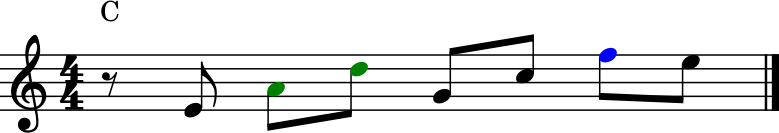

In [19]:
notes = "!C r/0.5 e4/0.5 a4/0.5*green d5/0.5*green g4/0.5 c5/0.5 f5/0.5*blue e5/0.5"
create_score(info, notes)

*Quartal melody*

## Vary Durations
The same pitches played over notes of different durations can provide nuance.

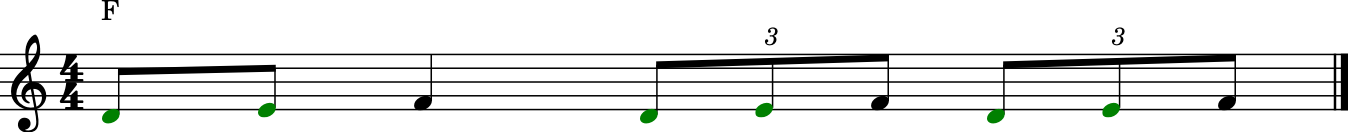

In [20]:
notes = "!F d4/0.5*green e4/0.5*green f4/1 d4/0.3*green e4/0.3*green f4/0.3 d4/0.3*green e4/0.3*green f4/0.3"
create_score(info, notes)

*Varying durations*

## Use Turns
Consider playing the first figure below instead of the second. The sixteenth notes 
comprise a “turn” ornament.

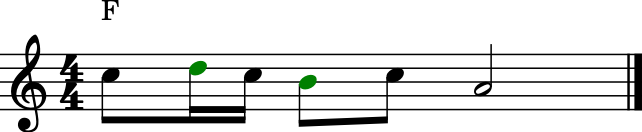

In [21]:
notes = "!F c5/0.5 d5/0.25*green c5/0.25 b4/0.5*green c5/0.5 a4/2"
create_score(info, notes)

## Start Most Phrases *Off* The Beat
Syncopation is an important ingredient in jazz. It acts to keep the melody moving 
forward. Consider starting phrases a half-beat before or after, or maybe two beats after, 
the start of the measure. Below we have replaced ordinary phrases in the first measure 
with similar syncopated ones in the second.

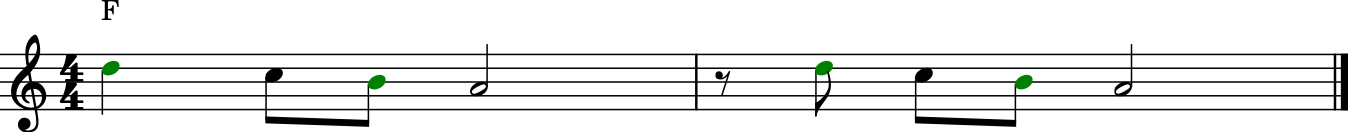

In [22]:
notes = "!F d5/1*green c5/0.5 b4/0.5*green a4/2 r/0.5 d5/0.5*green c5/0.5 b4/0.5*green a4/2"
create_score(info, notes)

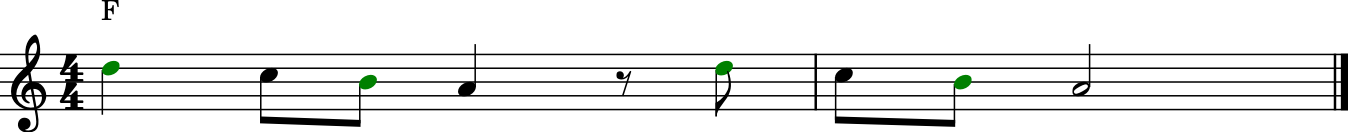

In [23]:
notes = "!F d5/1*green c5/0.5 b4/0.5*green a4/1 r/0.5 d5/0.5*green c5/0.5 b4/0.5*green a4/2"
create_score(info, notes)

*Starting phrases off the beat*

## Use Your Imagination
We have provided a small set of melodic improvisation ideas here. You should 
experiment with variations on these ideas for yourself and try to invent new ones. You 
can bring in ideas from other genres as well. 

Remember Duke Ellington’s famous words: “If it sounds good, it is good.” 

## An Extended Example
Below, I have constructed a solo for the first half of “Here’s that Rainy Day”, by Jimmy 
van Heusen. How many of the techniques mentioned here can you spot?

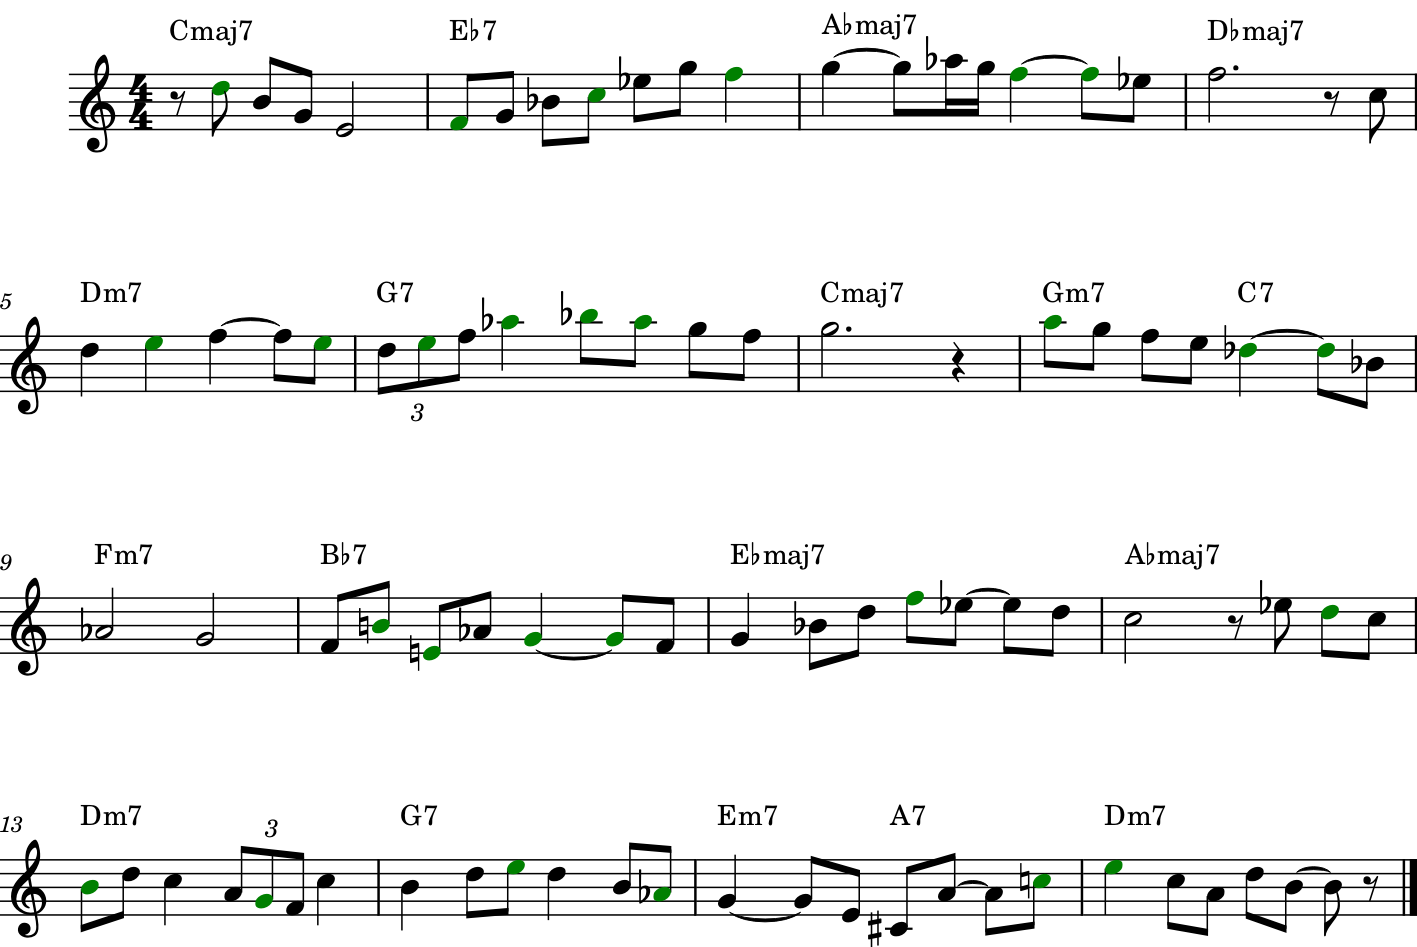

In [24]:
notes = "!Cmaj7 r/0.5 d5/0.5*green b4/0.5 g4/0.5 e4/2 !E-7 f4/0.5*green g4/0.5 b-4/0.5 c5/0.5*green e-5/0.5 g5/0.5 f5/1*green !A-maj7 g5/1{ g5/0.5} a-5/0.25 g5/0.25 f5/1*green{ f5/0.5*green} e-5/0.5 !D-maj7 f5/3 r/0.5 c5/0.5 ^"
notes += " !Dm7 d5/1 e5/1*green f5/1{ f5/0.5} e5/0.5*green !G7 d5/0.3 e5/0.3*green f5/0.3 a-5/1*green b-5/0.5*green a-5/0.5*green g5/0.5 f5/0.5 !Cmaj7 g5/3 r/1 !Gm7 A5/0.5*green g5/0.5 f5/0.5 e5/0.5 !C7 d-5/1*green{ d-5/0.5*green} b-4/0.5 ^"
notes += " !Fm7 a-4/2 g4/2 !B-7 f4/0.5 b4/0.5*green e4/0.5*green a-4/0.5 g4/1*green{ g4/0.5*green} f4/0.5 !E-maj7 g4/1 b-4/0.5 d5/0.5 f5/0.5*green e-5/0.5{ e-5/0.5} d5/0.5 !A-maj7 c5/2 r/0.5 e-5/0.5 d5/0.5*green c5/0.5 ^"
notes += " !Dm7 b4/0.5*green d5/0.5 c5/1 a4/0.3 g4/0.3*green f4/0.3 c5/1 !G7 b4/1 d5/0.5 e5/0.5*green d5/1 b4/0.5 a-4/0.5*green !Em7 g4/1{ g4/0.5} e4/0.5 !A7 c#4/0.5 a4/0.5{ a4/0.5} c5/0.5*green !Dm7 e5/1*green c5/0.5 a4/0.5 d5/0.5 b4/0.5{ b4/0.5} r/0.5"
create_score(info, notes)


*A solo over a standard tune*

## Appendix: Common Scale Choices for Common Chords
| Chords | Scales | Example Chord | Example Scales |
| :--- | :--- | :--- | :--- |
| Major triad<br>Major sixth<br>Major 69 | Major | C = c e g<br>C6 = c e g a<br>C69 = c e g a d | c d e f g a b (avoid f) |
| Major seventh<br>Major ninth<br>Major thirteenth | Major | CMaj7 = c e g b<br>CMaj9 = c e g b d<br> CMaj13 = c e g b d a | c d e f g a b (avoid f and c) |
| Major seventh #11<br>Major ninth #11<br>Major thirteenth #11 | Lydian | CMajor7#11 = c e g b f#<br>CMaj7#11 = c e g b d f#<br>CMaj7#11 = c e g b d f# a | c d e f# g a b (avoid c) |
| Minor triad<br>Minor sixth<br>Minor 69<br>Minor major seventh | Melodic minor | Cm = c eb g<br>Cm6 = c eb g a<br>Cm69 = c eb g a d<br>CmMaj7 = c eb g b | c d eb f g a b |
| Minor seventh<br> Minor ninth | Dorian | Cm7 = c eb g bb<br>Cm7 = c eb g bb d | c d eb f g a bb |
| Seventh<br>Ninth<br>Thirteenth | Mixolydian (dominant) | C7 = c e g bb<br>C9 = c e g bb d<br>C13 = c e g bb d a | c d e f g a bb c (avoid f) |
| Seventh #11<br>Ninth #11<br>Thirteenth #11 | Lydian dominant | C7#11 = c e g bb f#<br>C9#11 = c e g bb d f#<br>C13#11 = c e g bb d f# a | c d e f# g a bb c |
| Seventh sus4 (aka Eleventh) | Mixolydian | C7sus4 = c f g bb | c d e f g a bb c |
| Seventh flat 9<br>Seventh sharp 9 | Diminished, up half-step | C7b9 = c e g bb db<br>C7#9 = c e g bb d# | db eb e f# g a bb c |
| Seventh #5 #9 (aka Seventh alt) | Melodic minor, up half-step | C7#5#9 = c e g# bb d# | c# d# e f# g# bb c |
| Minor seventh flat 5 | Melodic minor, up minor third | Cm7b5 = c eb gb bb | eb f gb ab bb c d eb |
| Diminished seventh | Diminished | Cdim7 = c eb gb a | c d eb f gb ab a b c |